# Normal Distribution

- Different displays of normally distributed data
- Compare different samples from a normal distribution
- Check for normality
- Work with the cumulative distribution function (CDF)

Author:  Thomas Haslwanter, April-2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# seaborn is a package for the visualization of statistical data
import seaborn as sns
sns.set(style='ticks')

## Different Representations

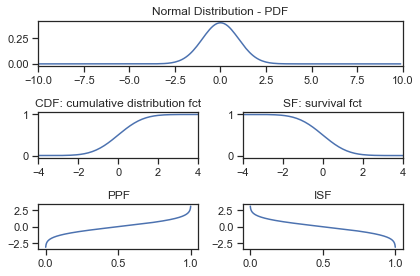

In [2]:
''' Different aspects of a normal distribution'''
# Generate the data
x = np.r_[-10:10:0.1]
rv = stats.norm(0,1)   # random variate

x2 = np.r_[0:1:0.001]

ax = plt.subplot2grid((3,2),(0,0), colspan=2)
plt.plot(x,rv.pdf(x))
plt.xlim([-10,10])
plt.title('Normal Distribution - PDF')

plt.subplot(323)
plt.plot(x,rv.cdf(x))
plt.xlim([-4,4])
plt.title('CDF: cumulative distribution fct')

plt.subplot(324)
plt.plot(x,rv.sf(x))
plt.xlim([-4,4])
plt.title('SF: survival fct')

plt.subplot(325)
plt.plot(x2,rv.ppf(x2))
plt.title('PPF')

plt.subplot(326)
plt.plot(x2,rv.isf(x2))
plt.title('ISF')
plt.tight_layout()
plt.show()
    

## Shifted distribution

Text(0.5, 1.0, 'Shifted Normal Distribution')

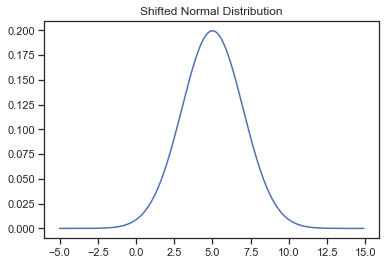

In [3]:
'''PDF, scatter plot, and histogram.'''
# Generate the data
x = np.arange(-5,15,0.1)
# Plot a normal distribution: "Probability density functions"
myMean = 5
mySD = 2
y = stats.norm(myMean, mySD).pdf(x)
plt.plot(x,y)
plt.title('Shifted Normal Distribution')

## Random numbers with a normal distribution

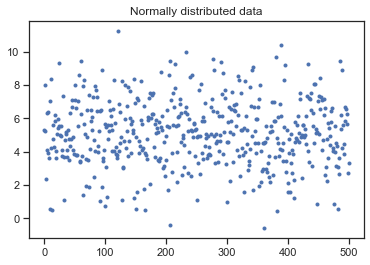

Text(0.5, 1.0, 'Histogram of normally distributed data')

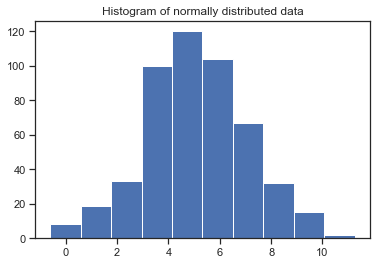

In [4]:
numData = 500
data = stats.norm.rvs(myMean, mySD, size = numData)
plt.plot(data, '.')
plt.title('Normally distributed data')
plt.show()

plt.hist(data)
plt.title('Histogram of normally distributed data')

## Multiple normal sample distributions

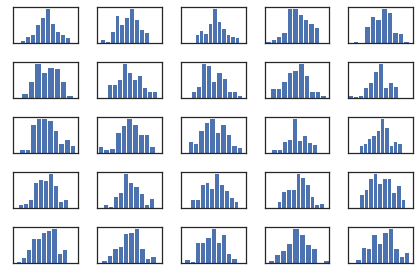

The standard error of the mean, with 100 samples, is 0.193


In [10]:
'''Show multiple samples from the same distribution, and compare means.'''
# Do this 25 times, and show the histograms
numRows = 5
numData = 100
for ii in range(numRows):
    for jj in range(numRows):
        data = stats.norm.rvs(myMean, mySD, size=numData)
        plt.subplot(numRows,numRows,numRows*ii+jj+1)
        plt.hist(data)

        plt.xticks([])
        plt.yticks([])
        plt.xlim(myMean-3*mySD, myMean+3*mySD)

plt.tight_layout()
plt.show()

# Check out the mean of 1000 normally distributded samples
numTrials = 1000;
numData = 100
myMeans = np.ones(numTrials)*np.nan
for ii in range(numTrials):
    data = stats.norm.rvs(myMean, mySD, size=numData)
    myMeans[ii] = np.mean(data)
print('The standard error of the mean, with {0} samples, is {1:5.3f}'.format(numData, np.std(myMeans, ddof=1)))

## Normality Check

(array([ 4.,  4.,  4., 17., 21., 24., 11.,  9.,  2.,  4.]),
 array([-0.19978878,  0.82453251,  1.8488538 ,  2.87317509,  3.89749638,
         4.92181767,  5.94613896,  6.97046024,  7.99478153,  9.01910282,
        10.04342411]),
 <a list of 10 Patch objects>)

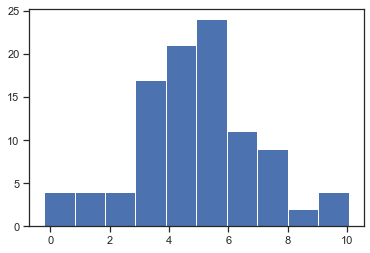

In [11]:
'''Check if the distribution is normal.'''
# Generate and show a distribution
numData = 100
data = stats.norm.rvs(myMean, mySD, size=numData)
plt.hist(data)

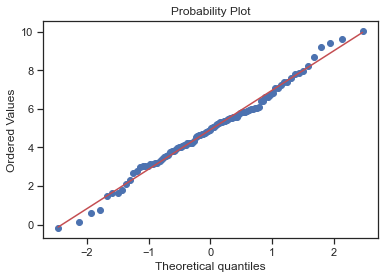

In [12]:
# Graphical test: if the data lie on a line, they are pretty much
# normally distributed
_ = stats.probplot(data, plot=plt)

In [13]:
# The scipy "normaltest" is based on D’Agostino and Pearson’s test that
# combines skew and kurtosis to produce an omnibus test of normality.
_, pVal = stats.normaltest(data)

# Or you can check for normality with Kolmogorov-Smirnov test: but this is only advisable for large sample numbers!
#_,pVal = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')

if pVal > 0.05:
    print('Data are probably normally distributed')


Data are probably normally distributed


## Values from the Cumulative Distribution Function

With a threshold of 2.00, you get 7.0% of the data
To get 97.5% of the data, you need a threshold of 8.92.


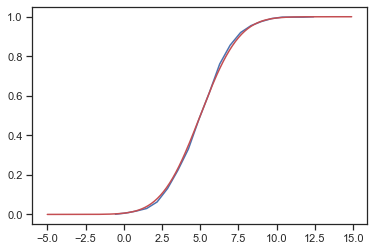

In [19]:
'''Calculate an empirical cumulative distribution function, compare it with the exact one, and
find the exact point for a specific data value.'''

# Generate normally distributed random data
myMean = 5
mySD = 2
numData = 1000
data = stats.norm.rvs(myMean, mySD, size=numData)

# Calculate the cumulative distribution function, CDF
numbins = 20
counts, bin_edges = np.histogram(data, bins=numbins, density=True)
cdf = np.cumsum(counts)
cdf /= max(cdf)

# compare with the exact CDF
plt.plot(bin_edges[1:],cdf)
plt.plot(x, stats.norm.cdf(x, myMean, mySD),'r')

# Find out the value corresponding to the x-th percentile: the
# "cumulative distribution function"
value = 2
myMean = 5
mySD = 2
cdf = stats.norm.cdf(value, myMean, mySD)
print(('With a threshold of {0:4.2f}, you get {1}% of the data'.format(value, round(cdf*100))))

# For the percentile corresponding to a certain value: 
# the "inverse cumulative distribution function" 
value = 0.025
icdf = stats.norm.isf(value, myMean, mySD)
print('To get {0}% of the data, you need a threshold of {1:4.2f}.'.format((1-value)*100, icdf))